## The chapter is organized as follows:

* “The DataFrame Class”

This section starts by exploring the basic characteristics and capabilities of
the DataFrame class of pandas by using simple and small data sets; it then
shows how to transform a NumPy ndarray object into a DataFrame object.

* “Basic Analytics” and “Basic Visualization”

Basic analytics and visualization capabilities are introduced in these
sections (later chapters go deeper into these topics).

* “The Series Class”

This rather brief section covers the Series class of pandas, which in a
sense represents a special case of the DataFrame class with a single column
of data only.

* “GroupBy Operations”

One of the strengths of the DataFrame class lies in grouping data according
to a single or multiple columns. This section explores the grouping
capabilities of pandas.

* “Selection”

This section illustrates how the use of (complex) conditions allows for the
easy selection of data from a DataFrame object.
“Concatenation, Joining, and Merging”
The combining of different data sets into one is an important operation in
data analysis. pandas provides different options to accomplish this task, as
described in this section.

* “Performance Aspects”

Like Python in general, pandas often provides multiple options to
accomplish the same goal. This section takes a brief look at potential
performance difference

## The DataFrame Class
The DataFrame class is useful to handle columnar data. It is similar to a relational database or Excel spreadsheet.

Data can be provided in different shapes and types (list, tuple, ndarray, or dict)

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame([10, 20, 30, 40], 
                  columns=['numbers'], 
                  index=['a', 'b', 'c', 'd'])
df

,numbers
a,10
b,20
c,30
d,40


In [3]:
print('index:', df.index)
print()
print('columns:', df.columns)
print()
print('c:', df.loc['c'])
print()
print('retrieve indexes a and d:', df.loc[['a', 'b']])
print()
print('df.sum():', df.sum())
print()
print('df.apply():', df.apply(lambda x: x ** 2))

index: Index(['a', 'b', 'c', 'd'], dtype='object')

columns: Index(['numbers'], dtype='object')

c: numbers    30
Name: c, dtype: int64

retrieve indexes a and d:    numbers
a       10
b       20

df.sum(): numbers    100
dtype: int64

df.apply():    numbers
a      100
b      400
c      900
d     1600


Add a new column by assignment

In [4]:
df['floats'] = (1.5, 2.5, 3.5, 4.5)
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [5]:
df['names'] = pd.DataFrame(['Yves', 'Sandra', 'Lilli', 'Henry'], 
                           index=['d', 'a', 'b', 'c'])
df

,numbers,floats,names
a,10,1.5,Sandra
b,20,2.5,Lilli
c,30,3.5,Henry
d,40,4.5,Yves


## Append data to a DataFrame

In [6]:
# note that append does not mutate the df!
df.append({'numbers': 100, 'floats': 5.75, 'names': 'Jil'}, 
               ignore_index=True) # ignores index

,numbers,floats,names
0,10,1.50,Sandra
1,20,2.50,Lilli
2,30,3.50,Henry
3,40,4.50,Yves
4,100,5.75,Jil


In [7]:
df = df.append(pd.DataFrame({'numbers': 100, 'floats': 5.75, 'names': 'Jil'}, 
                            index=['y',]))
df

,numbers,floats,names
a,10,1.50,Sandra
b,20,2.50,Lilli
c,30,3.50,Henry
d,40,4.50,Yves
y,100,5.75,Jil


In [8]:
df = df.append(pd.DataFrame({'names':'Liz'},index=['z',]),sort=False)
df

,numbers,floats,names
a,10.0,1.50,Sandra
b,20.0,2.50,Lilli
c,30.0,3.50,Henry
d,40.0,4.50,Yves
y,100.0,5.75,Jil
z,NaN,NaN,Liz


In [9]:
print(df.dtypes)
print()
print(df.info())
print()
print(df.describe())

numbers    float64
floats     float64
names       object
dtype: object

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, a to z
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   numbers  5 non-null      float64
 1   floats   5 non-null      float64
 2   names    6 non-null      object 
dtypes: float64(2), object(1)
memory usage: 192.0+ bytes
None

          numbers    floats
count    5.000000  5.000000
mean    40.000000  3.550000
std     35.355339  1.662077
min     10.000000  1.500000
25%     20.000000  2.500000
50%     30.000000  3.500000
75%     40.000000  4.500000
max    100.000000  5.750000


## Select

In [10]:
df[['numbers', 'floats']].mean()

numbers    40.00
floats      3.55
dtype: float64

In [11]:
df[['numbers', 'floats']].std()

numbers    35.355339
floats      1.662077
dtype: float64

## Working with numpy objects, and random numbers

In [12]:
import numpy as np
np.random.seed(100)

In [13]:
a = np.random.standard_normal((9, 4))
a

array([[-1.74976547,  0.3426804 ,  1.1530358 , -0.25243604],
       [ 0.98132079,  0.51421884,  0.22117967, -1.07004333],
       [-0.18949583,  0.25500144, -0.45802699,  0.43516349],
       [-0.58359505,  0.81684707,  0.67272081, -0.10441114],
       [-0.53128038,  1.02973269, -0.43813562, -1.11831825],
       [ 1.61898166,  1.54160517, -0.25187914, -0.84243574],
       [ 0.18451869,  0.9370822 ,  0.73100034,  1.36155613],
       [-0.32623806,  0.05567601,  0.22239961, -1.443217  ],
       [-0.75635231,  0.81645401,  0.75044476, -0.45594693]])

In [14]:
df = pd.DataFrame(a) # adds columns and indexes
df

,0,1,2,3
0,-1.749765,0.342680,1.153036,-0.252436
1,0.981321,0.514219,0.221180,-1.070043
2,-0.189496,0.255001,-0.458027,0.435163
3,-0.583595,0.816847,0.672721,-0.104411
4,-0.531280,1.029733,-0.438136,-1.118318
5,1.618982,1.541605,-0.251879,-0.842436
6,0.184519,0.937082,0.731000,1.361556
7,-0.326238,0.055676,0.222400,-1.443217
8,-0.756352,0.816454,0.750445,-0.455947


Set names of columns

In [15]:
# columns is a property of df
df.columns = ['No1', 'No2', 'No3', 'No4']
df

,No1,No2,No3,No4
0,-1.749765,0.342680,1.153036,-0.252436
1,0.981321,0.514219,0.221180,-1.070043
2,-0.189496,0.255001,-0.458027,0.435163
3,-0.583595,0.816847,0.672721,-0.104411
4,-0.531280,1.029733,-0.438136,-1.118318
5,1.618982,1.541605,-0.251879,-0.842436
6,0.184519,0.937082,0.731000,1.361556
7,-0.326238,0.055676,0.222400,-1.443217
8,-0.756352,0.816454,0.750445,-0.455947


In [16]:
df['No2'].mean()

0.701033094145646

## Working with time series

In [17]:
dates = pd.date_range('2019-1-1', periods=9, freq='M')
dates

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30'],
              dtype='datetime64[ns]', freq='M')

In [18]:
df.index = dates
df # now we have a time series!

,No1,No2,No3,No4
2019-01-31,-1.749765,0.342680,1.153036,-0.252436
2019-02-28,0.981321,0.514219,0.221180,-1.070043
2019-03-31,-0.189496,0.255001,-0.458027,0.435163
2019-04-30,-0.583595,0.816847,0.672721,-0.104411
2019-05-31,-0.531280,1.029733,-0.438136,-1.118318
2019-06-30,1.618982,1.541605,-0.251879,-0.842436
2019-07-31,0.184519,0.937082,0.731000,1.361556
2019-08-31,-0.326238,0.055676,0.222400,-1.443217
2019-09-30,-0.756352,0.816454,0.750445,-0.455947


In [19]:
# retrieve data as ndarray, can be useful for machine learning
df.values, df.to_numpy()

array([[-1.74976547,  0.3426804 ,  1.1530358 , -0.25243604],
       [ 0.98132079,  0.51421884,  0.22117967, -1.07004333],
       [-0.18949583,  0.25500144, -0.45802699,  0.43516349],
       [-0.58359505,  0.81684707,  0.67272081, -0.10441114],
       [-0.53128038,  1.02973269, -0.43813562, -1.11831825],
       [ 1.61898166,  1.54160517, -0.25187914, -0.84243574],
       [ 0.18451869,  0.9370822 ,  0.73100034,  1.36155613],
       [-0.32623806,  0.05567601,  0.22239961, -1.443217  ],
       [-0.75635231,  0.81645401,  0.75044476, -0.45594693]])

In [20]:
np.array(df)

array([[-1.74976547,  0.3426804 ,  1.1530358 , -0.25243604],
       [ 0.98132079,  0.51421884,  0.22117967, -1.07004333],
       [-0.18949583,  0.25500144, -0.45802699,  0.43516349],
       [-0.58359505,  0.81684707,  0.67272081, -0.10441114],
       [-0.53128038,  1.02973269, -0.43813562, -1.11831825],
       [ 1.61898166,  1.54160517, -0.25187914, -0.84243574],
       [ 0.18451869,  0.9370822 ,  0.73100034,  1.36155613],
       [-0.32623806,  0.05567601,  0.22239961, -1.443217  ],
       [-0.75635231,  0.81645401,  0.75044476, -0.45594693]])

## Analytics

In [21]:
print(df.info())
print()
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9 entries, 2019-01-31 to 2019-09-30
Freq: M
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No1     9 non-null      float64
 1   No2     9 non-null      float64
 2   No3     9 non-null      float64
 3   No4     9 non-null      float64
dtypes: float64(4)
memory usage: 360.0 bytes
None

            No1       No2       No3       No4
count  9.000000  9.000000  9.000000  9.000000
mean  -0.150212  0.701033  0.289193 -0.387788
std    0.988306  0.457685  0.579920  0.877532
min   -1.749765  0.055676 -0.458027 -1.443217
25%   -0.583595  0.342680 -0.251879 -1.070043
50%   -0.326238  0.816454  0.222400 -0.455947
75%    0.184519  0.937082  0.731000 -0.104411
max    1.618982  1.541605  1.153036  1.361556


In [22]:
df.mean(axis=0)

No1   -0.150212
No2    0.701033
No3    0.289193
No4   -0.387788
dtype: float64

In [23]:
df.mean(axis=1)

2019-01-31   -0.126621
2019-02-28    0.161669
2019-03-31    0.010661
2019-04-30    0.200390
2019-05-31   -0.264500
2019-06-30    0.516568
2019-07-31    0.803539
2019-08-31   -0.372845
2019-09-30    0.088650
Freq: M, dtype: float64

In [24]:
df.cumsum()

,No1,No2,No3,No4
2019-01-31,-1.749765,0.342680,1.153036,-0.252436
2019-02-28,-0.768445,0.856899,1.374215,-1.322479
2019-03-31,-0.957941,1.111901,0.916188,-0.887316
2019-04-30,-1.541536,1.928748,1.588909,-0.991727
2019-05-31,-2.072816,2.958480,1.150774,-2.110045
2019-06-30,-0.453834,4.500086,0.898895,-2.952481
2019-07-31,-0.269316,5.437168,1.629895,-1.590925
2019-08-31,-0.595554,5.492844,1.852294,-3.034142
2019-09-30,-1.351906,6.309298,2.602739,-3.490089


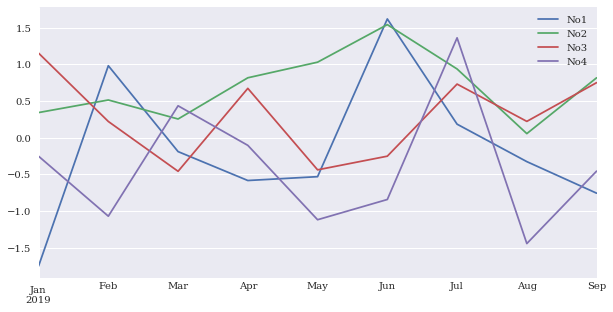

In [25]:
from pylab import plt,mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

df.plot(figsize=(10, 5));

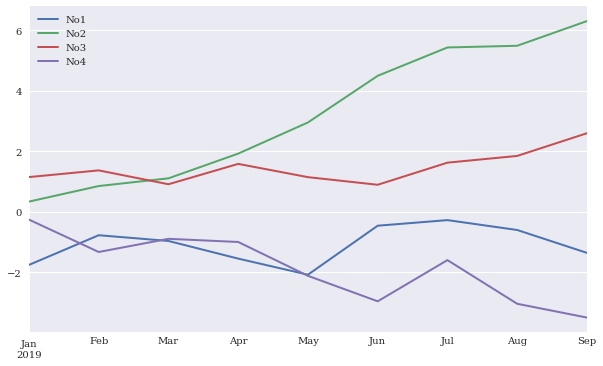

In [26]:
df.cumsum().plot(lw=2.0,figsize=(10,6));

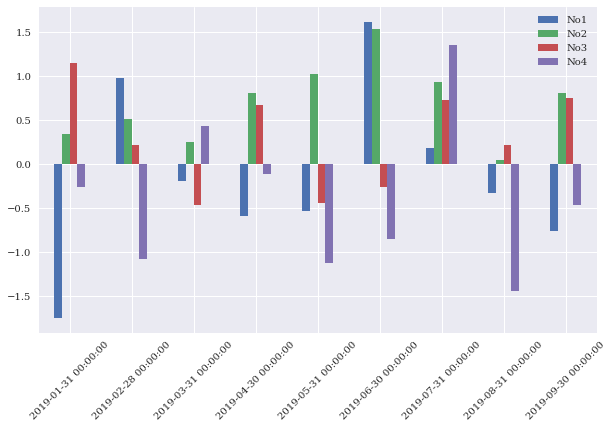

In [27]:
df.plot.bar(figsize=(10, 6), rot=45);

# Series class
The Series class is a specialization of the DataFrame class

In [28]:
type(df)

pandas.core.frame.DataFrame

In [29]:
s = pd.Series(np.linspace(0, 15, 7), name='series')
s

0     0.0
1     2.5
2     5.0
3     7.5
4    10.0
5    12.5
6    15.0
Name: series, dtype: float64

In [30]:
type(s)

pandas.core.series.Series

In [31]:
s.mean()

7.5

In [32]:
t = df['No1']
t

2019-01-31   -1.749765
2019-02-28    0.981321
2019-03-31   -0.189496
2019-04-30   -0.583595
2019-05-31   -0.531280
2019-06-30    1.618982
2019-07-31    0.184519
2019-08-31   -0.326238
2019-09-30   -0.756352
Freq: M, Name: No1, dtype: float64

In [33]:
type(t)

pandas.core.series.Series

In [34]:
t.mean()

-0.15021177307319458

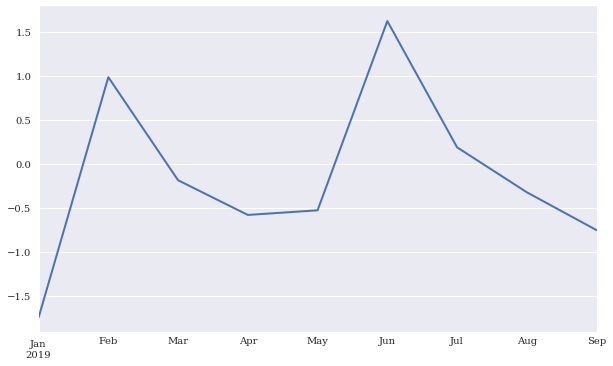

In [35]:
t.plot(lw=2.0, figsize=(10, 6));

# GroupBy Operations
These operations can be compared to those performed with relational databases

In [36]:
# The column Quarter can be used to group data, based on the label
df['Quarter'] = ['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3']
df

,No1,No2,No3,No4,Quarter
2019-01-31,-1.749765,0.342680,1.153036,-0.252436,Q1
2019-02-28,0.981321,0.514219,0.221180,-1.070043,Q1
2019-03-31,-0.189496,0.255001,-0.458027,0.435163,Q1
2019-04-30,-0.583595,0.816847,0.672721,-0.104411,Q2
2019-05-31,-0.531280,1.029733,-0.438136,-1.118318,Q2
2019-06-30,1.618982,1.541605,-0.251879,-0.842436,Q2
2019-07-31,0.184519,0.937082,0.731000,1.361556,Q3
2019-08-31,-0.326238,0.055676,0.222400,-1.443217,Q3
2019-09-30,-0.756352,0.816454,0.750445,-0.455947,Q3


In [37]:
groups = df.groupby('Quarter')

In [38]:
groups.size()

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [39]:
groups.mean()

,No1,No2,No3,No4
Quarter,,,,
Q1,-0.319314,0.370634,0.305396,-0.295772
Q2,0.168035,1.129395,-0.005765,-0.688388
Q3,-0.299357,0.603071,0.567948,-0.179203


In [40]:
groups.max()

,No1,No2,No3,No4
Quarter,,,,
Q1,0.981321,0.514219,1.153036,0.435163
Q2,1.618982,1.541605,0.672721,-0.104411
Q3,0.184519,0.937082,0.750445,1.361556


In [41]:
groups.aggregate(['min', 'max']).round(2)

No1         No2         No3         No4      
          min   max   min   max   min   max   min   max
Quarter                                                
Q1      -1.75  0.98  0.26  0.51 -0.46  1.15 -1.07  0.44
Q2      -0.58  1.62  0.82  1.54 -0.44  0.67 -1.12 -0.10
Q3      -0.76  0.18  0.06  0.94  0.22  0.75 -1.44  1.36

In [42]:
df['Odd_Even'] = ['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd']
df

,No1,No2,No3,No4,Quarter,Odd_Even
2019-01-31,-1.749765,0.342680,1.153036,-0.252436,Q1,Odd
2019-02-28,0.981321,0.514219,0.221180,-1.070043,Q1,Even
2019-03-31,-0.189496,0.255001,-0.458027,0.435163,Q1,Odd
2019-04-30,-0.583595,0.816847,0.672721,-0.104411,Q2,Even
2019-05-31,-0.531280,1.029733,-0.438136,-1.118318,Q2,Odd
2019-06-30,1.618982,1.541605,-0.251879,-0.842436,Q2,Even
2019-07-31,0.184519,0.937082,0.731000,1.361556,Q3,Odd
2019-08-31,-0.326238,0.055676,0.222400,-1.443217,Q3,Even
2019-09-30,-0.756352,0.816454,0.750445,-0.455947,Q3,Odd


In [43]:
groups = df.groupby(['Quarter', 'Odd_Even'])

In [44]:
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

In [45]:
groups[['No1', 'No4']].aggregate([sum, np.mean, np.std, min, max])

No1                                               No4  \
                       sum      mean       std       min       max       sum   
Quarter Odd_Even                                                               
Q1      Even      0.981321  0.981321       NaN  0.981321  0.981321 -1.070043   
        Odd      -1.939261 -0.969631  1.103277 -1.749765 -0.189496  0.182727   
Q2      Even      1.035387  0.517693  1.557457 -0.583595  1.618982 -0.946847   
        Odd      -0.531280 -0.531280       NaN -0.531280 -0.531280 -1.118318   
Q3      Even     -0.326238 -0.326238       NaN -0.326238 -0.326238 -1.443217   
        Odd      -0.571834 -0.285917  0.665296 -0.756352  0.184519  0.905609   

                                                          
                      mean       std       min       max  
Quarter Odd_Even                                          
Q1      Even     -1.070043       NaN -1.070043 -1.070043  
        Odd       0.091364  0.486206 -0.252436  0.435163  
Q2      Even     -0.473423  0.521862 -0.842436 -0.104411  
        Odd      -1.118318       NaN -1.118318 -1.118318  
Q3      Even     -1.443217       NaN -1.443217 -1.443217  
        Odd       0.452805  1.285169 -0.455947  1.361556

## Complex selection

In [46]:
data = np.random.standard_normal((10, 2))

In [47]:
df = pd.DataFrame(data, columns=['x', 'y'])
df.head()

,x,y
0,1.189622,-1.690617
1,-1.356399,-1.232435
2,-0.544439,-0.668172
3,0.007315,-0.612939
4,1.299748,-1.733096


In [48]:
df.tail()

,x,y
5,-0.983310,0.357508
6,-1.613579,1.470714
7,-1.188018,-0.549746
8,-0.940046,-0.827932
9,0.108863,0.507810


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       10 non-null     float64
 1   y       10 non-null     float64
dtypes: float64(2)
memory usage: 288.0 bytes


In [50]:
df['x'] > 0.5

0     True
1    False
2    False
3    False
4     True
5    False
6    False
7    False
8    False
9    False
Name: x, dtype: bool

In [51]:
((df['x'] > 0) & (df['y'] < 0))

0     True
1    False
2    False
3     True
4     True
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [52]:
((df['x'] > 0) | (df['y'] < 0))

0     True
1     True
2     True
3     True
4     True
5    False
6    False
7     True
8     True
9     True
dtype: bool

In [53]:
df[df['x'] > 0]

,x,y
0,1.189622,-1.690617
3,0.007315,-0.612939
4,1.299748,-1.733096
9,0.108863,0.507810


In [54]:
df.query('x > 0')

,x,y
0,1.189622,-1.690617
3,0.007315,-0.612939
4,1.299748,-1.733096
9,0.108863,0.507810


In [55]:
df[(df['x'] > 0) & (df['y'] < 0)]

,x,y
0,1.189622,-1.690617
3,0.007315,-0.612939
4,1.299748,-1.733096


In [56]:
df.query('x > 0 & y < 0')

,x,y
0,1.189622,-1.690617
3,0.007315,-0.612939
4,1.299748,-1.733096


In [57]:
df[(df.x > 0) | (df.y < 0)]

,x,y
0,1.189622,-1.690617
1,-1.356399,-1.232435
2,-0.544439,-0.668172
3,0.007315,-0.612939
4,1.299748,-1.733096
7,-1.188018,-0.549746
8,-0.940046,-0.827932
9,0.108863,0.507810


In [58]:
df > 0

,x,y
0,True,False
1,False,False
2,False,False
3,True,False
4,True,False
5,False,True
6,False,True
7,False,False
8,False,False
9,True,True


In [59]:
df[df > 0]

,x,y
0,1.189622,NaN
1,NaN,NaN
2,NaN,NaN
3,0.007315,NaN
4,1.299748,NaN
5,NaN,0.357508
6,NaN,1.470714
7,NaN,NaN
8,NaN,NaN
9,0.108863,0.507810


## Concatenation, Joining and Merging

In [60]:
df1 = pd.DataFrame(['100', '200', '300', '400'], 
                   index=['a', 'b', 'c', 'd'], columns=['A'])
df1

,A
a,100
b,200
c,300
d,400


In [61]:
df2 = pd.DataFrame(['200', '150', '50'], 
                   index=['f', 'b', 'd'], 
                   columns=['B'])
df2

,B
f,200
b,150
d,50


## Concatenation

In [62]:
df1.append(df2, sort=False)

,A,B
a,100,NaN
b,200,NaN
c,300,NaN
d,400,NaN
f,NaN,200
b,NaN,150
d,NaN,50


In [63]:
df1.append(df2, ignore_index=True, sort=False)

,A,B
0,100,NaN
1,200,NaN
2,300,NaN
3,400,NaN
4,NaN,200
5,NaN,150
6,NaN,50


In [64]:
pd.concat((df1, df2), sort=False)

,A,B
a,100,NaN
b,200,NaN
c,300,NaN
d,400,NaN
f,NaN,200
b,NaN,150
d,NaN,50


In [65]:
pd.concat((df1, df2), ignore_index=True, sort=False)

,A,B
0,100,NaN
1,200,NaN
2,300,NaN
3,400,NaN
4,NaN,200
5,NaN,150
6,NaN,50


## Joining

In [66]:
df1.join(df2) # joining is done by df1's index

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50


In [67]:
df2.join(df1) # joining is done by df2's index

,B,A
f,200,NaN
b,150,200
d,50,400


In [68]:
df1.join(df2, how='left')

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50


In [69]:
df1.join(df2, how='right')

,A,B
f,NaN,200
b,200,150
d,400,50


In [70]:
df1.join(df2, how='inner')

,A,B
b,200,150
d,400,50


In [71]:
df1.join(df2, how='outer') # preserves index from both dataframes

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50
f,NaN,200


## Merging 
Merging takes place on common column

In [72]:
c = pd.Series([250, 150, 50], index=['b', 'd', 'c'])
df1['C'] = c
df2['C'] = c

In [73]:
df1

,A,C
a,100,NaN
b,200,250.0
c,300,50.0
d,400,150.0


In [74]:
df2

,B,C
f,200,NaN
b,150,250.0
d,50,150.0


In [75]:
pd.merge(df1, df2), df1.merge(df2)

,A,C,B
0,100,NaN,200
1,200,250.0,150
2,400,150.0,50


In [76]:
pd.merge(df1, df2, on='C')

,A,C,B
0,100,NaN,200
1,200,250.0,150
2,400,150.0,50


In [77]:
pd.merge(df1, df2, how='outer')

,A,C,B
0,100,NaN,200
1,200,250.0,150
2,300,50.0,NaN
3,400,150.0,50


In [78]:
pd.merge(df1, df2, left_on='A', right_on='B')

,A,C_x,B,C_y
0,200,250.0,200,NaN


In [79]:
pd.merge(df1,df2, left_on='A', right_on='B', how='outer')

,A,C_x,B,C_y
0,100,NaN,NaN,NaN
1,200,250.0,200,NaN
2,300,50.0,NaN,NaN
3,400,150.0,NaN,NaN
4,NaN,NaN,150,250.0
5,NaN,NaN,50,150.0


In [80]:
pd.merge(df1, df2, on='C', left_index=True)

,A,C,B
f,100,NaN,200
b,200,250.0,150
d,400,150.0,50


In [81]:
pd.merge(df1, df2, left_index=True, right_index=True)

,A,C_x,B,C_y
b,200,250.0,150,250.0
d,400,150.0,50,150.0


In [82]:
pd.merge(df1, df2, on='C', right_index=True)

,A,C,B
a,100,NaN,200
b,200,250.0,150
d,400,150.0,50


In [83]:
pd.merge(df1, df2, on='C', left_index=True, right_index=True)

,A,C,B
b,200,250.0,150
d,400,150.0,50


## Performance

In [84]:
data = np.random.standard_normal((1000000, 2))
data.nbytes

16000000

In [85]:
df = pd.DataFrame(data, columns=['x', 'y'])

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   x       1000000 non-null  float64
 1   y       1000000 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


In [87]:
%time res = df['x'] + df['y'] # fastest approach

Wall time: 4.99 ms


In [88]:
res[:3]

0    0.387242
1   -0.969343
2   -0.863159
dtype: float64

In [89]:
%time res = df.sum(axis=1)

Wall time: 81.8 ms


In [90]:
res[:3] # compare res with different approach

0    0.387242
1   -0.969343
2   -0.863159
dtype: float64

In [91]:
%time res = df.values.sum(axis=1)

Wall time: 32 ms


In [92]:
res[:3]

array([ 0.3872424 , -0.96934273, -0.86315944])

In [93]:
%time res = np.sum(df, axis=1)

Wall time: 89.8 ms


In [94]:
%time res = np.sum(df.values, axis=1)

Wall time: 33 ms


## eval() and apply()

In [95]:
%time res = df.eval('x + y')

Wall time: 18.9 ms


In [96]:
%time res = df.apply(lambda row: row['x'] + row['y'], axis=1) # worst method

In [ ]:
df.head()

,x,y
0,-0.862227,1.249470
1,-0.079611,-0.889731
2,-0.881798,0.018639
3,0.237845,0.013549
4,-1.635529,-1.044210


In [ ]:
def f(x):
    return 3 * x + 5

In [ ]:
%time df.apply(f).head()

Wall time: 78.8 ms


,x,y
0,2.413318,8.748409
1,4.761166,2.330806
2,2.354605,5.055917
3,5.713534,5.040646
4,0.093412,1.867370


In [ ]:
%time f(df).head()

Wall time: 19.9 ms


,x,y
0,2.413318,8.748409
1,4.761166,2.330806
2,2.354605,5.055917
3,5.713534,5.040646
4,0.093412,1.867370


In [ ]:
def times2(x):
    return 2 * x

In [ ]:
%time df.apply(times2).head()

Wall time: 71.8 ms


,x,y
0,-1.724455,2.498939
1,-0.159222,-1.779463
2,-1.763597,0.037278
3,0.475689,0.027097
4,-3.271059,-2.088420


In [ ]:
%time df['x'].apply(times2).head()

Wall time: 354 ms


0   -1.724455
1   -0.159222
2   -1.763597
3    0.475689
4   -3.271059
Name: x, dtype: float64

In [ ]:
%time times2(df['x']).head()

Wall time: 2.99 ms


0   -1.724455
1   -0.159222
2   -1.763597
3    0.475689
4   -3.271059
Name: x, dtype: float64

In [ ]:
%time times2(df).head()

Wall time: 4.99 ms


,x,y
0,-1.724455,2.498939
1,-0.159222,-1.779463
2,-1.763597,0.037278
3,0.475689,0.027097
4,-3.271059,-2.088420
